In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")
#importing modules required for building predictive model

In [119]:
df=pd.read_csv('EMPdataset.csv')
#reading the dataset

In [120]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [121]:
df.shape

(1470, 35)

In [122]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [124]:
#dropping columns irrelevant for prediction
data = df.drop(['EmployeeCount', 'EmployeeNumber','Over18', 'StandardHours'],axis=1)

In [125]:
data.isnull().sum()
#checking for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [126]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [127]:
data.shape

(1470, 31)

In [128]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','EducationField',
                      'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
#converting the categorical column values into numerical values

In [129]:
data_encoded = data.copy(deep=True)

In [130]:
lab_enc = preprocessing.LabelEncoder()
for col in categorical_column:
        data_encoded[col] = lab_enc.fit_transform(data[col])
        le_name_mapping = dict(zip(lab_enc.classes_, lab_enc.transform(lab_enc.classes_)))
        print('Feature', col)
        print('mapping', le_name_mapping)
        print("-------------------------------------------------------------------------------------------------")

Feature Attrition
mapping {'No': 0, 'Yes': 1}
-------------------------------------------------------------------------------------------------
Feature BusinessTravel
mapping {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}
-------------------------------------------------------------------------------------------------
Feature Department
mapping {'Human Resources': 0, 'Research & Development': 1, 'Sales': 2}
-------------------------------------------------------------------------------------------------
Feature EducationField
mapping {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}
-------------------------------------------------------------------------------------------------
Feature Gender
mapping {'Female': 0, 'Male': 1}
-------------------------------------------------------------------------------------------------
Feature JobRole
mapping {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Te

In [131]:
data_encoded.head()
#after preprocessing

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [132]:
data_encoded.shape

(1470, 31)

In [133]:
data_encoded['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

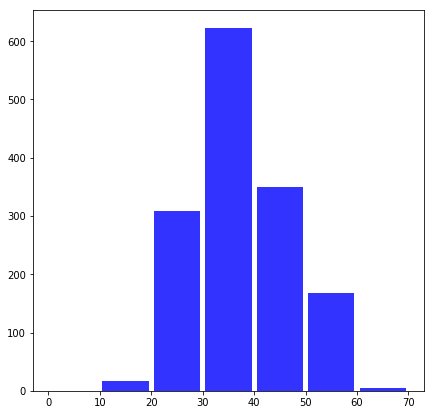

In [134]:
#Plot to see distribution of age overall
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(data_encoded['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='blue')

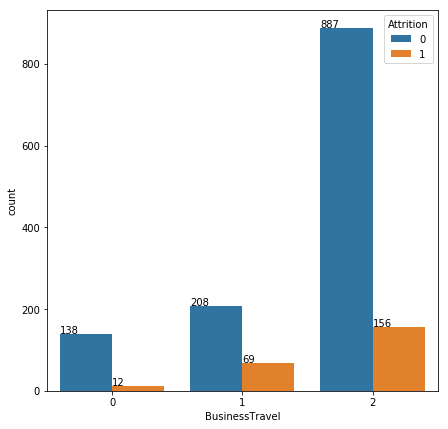

In [135]:
ax = sns.countplot(x="BusinessTravel", hue="Attrition", data=data_encoded)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))
    #plot to show business travel and attrition

In [136]:
positive_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 1]
negative_attrition_df = data_encoded.loc[data_encoded['Attrition'] == 0]

(array([807., 246., 180.,   0.,   0.,   0.,   0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

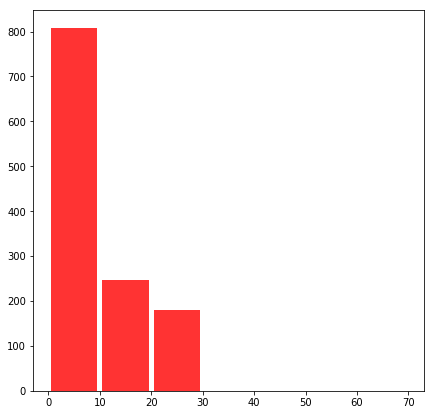

In [137]:
plt.hist(negative_attrition_df['DistanceFromHome'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

In [138]:
df_age = data_encoded.copy(deep=True)
df_age.loc[df_age['Age'] <= 20, 'Age'] = 0
df_age.loc[(df_age['Age'] > 20) & (df_age['Age'] <= 30), 'Age'] = 1
df_age.loc[(df_age['Age'] > 30) & (df_age['Age'] <= 40), 'Age'] = 2
df_age.loc[(df_age['Age'] > 40) & (df_age['Age'] <= 50), 'Age'] = 3
df_age.loc[(df_age['Age'] > 50), 'Age'] = 4

In [139]:
df_age = pd.DataFrame({'count': df_age.groupby(["Gender", "Attrition"]).size()}).reset_index()
df_age['Gender-attrition'] = df_age['Gender'].astype(str) + "-" + df_age['Attrition'].astype(str).map(str)

In [140]:
df_age
#gender 0 is male 1 is female
#attrition 0 is staying 1 means leaving

,Gender,Attrition,count,Gender-attrition
0,0,0,501,0-0
1,0,1,87,0-1
2,1,0,732,1-0
3,1,1,150,1-1


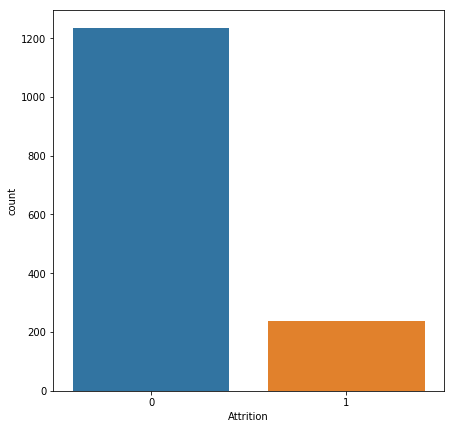

In [141]:
sns.countplot(data_encoded['Attrition'])

In [142]:
#shuffling the data to get a unbiased result
shuffled_df = data_encoded.sample(frac=1,random_state=4)

pos = shuffled_df.loc[shuffled_df['Attrition'] == 1]
neg = shuffled_df.loc[shuffled_df['Attrition'] == 0].sample(n=1233,random_state=42)

In [143]:
df=pd.concat([pos,neg])
df.head(n=15)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1153,18,1,1,544,2,3,2,3,2,0,...,3,3,0,0,2,4,0,0,0,0
608,55,1,2,436,2,2,1,3,3,1,...,3,3,0,12,3,2,9,7,7,3
293,26,1,2,950,2,4,4,2,4,1,...,3,2,0,8,0,3,8,7,7,4
1452,50,1,1,878,2,1,4,1,2,1,...,3,4,2,12,3,3,6,3,0,1
656,32,1,2,374,1,25,4,1,1,1,...,4,3,0,1,2,1,1,0,0,1
132,31,1,2,542,2,20,3,1,2,0,...,3,3,1,4,2,3,2,2,2,2
663,21,1,2,1427,1,18,1,4,4,0,...,3,1,0,1,3,2,1,0,0,0
1237,32,1,2,964,2,1,2,1,1,1,...,3,2,0,10,2,3,0,0,0,0
102,20,1,1,871,1,6,3,1,4,0,...,3,2,0,1,5,3,1,0,1,0
1058,34,1,2,790,2,24,4,3,1,0,...,4,3,0,16,2,4,15,9,10,10


In [144]:
df.shape

(1470, 31)

In [145]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

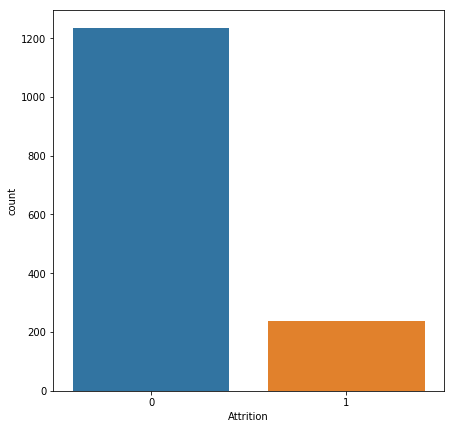

In [146]:
sns.countplot(x='Attrition',data=df)
#after shuffling

In [147]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [148]:
X=df.iloc[:,df.columns !='Attrition'].values
Y=df.iloc[:,df.columns =="Attrition"].values

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [149]:
x=df.iloc[:,df.columns !='Attrition']
y=df.iloc[:,df.columns =='Attrition']

In [150]:
x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1153,18,1,544,2,3,2,3,2,0,70,...,3,3,0,0,2,4,0,0,0,0
608,55,2,436,2,2,1,3,3,1,37,...,3,3,0,12,3,2,9,7,7,3
293,26,2,950,2,4,4,2,4,1,48,...,3,2,0,8,0,3,8,7,7,4
1452,50,1,878,2,1,4,1,2,1,94,...,3,4,2,12,3,3,6,3,0,1
656,32,2,374,1,25,4,1,1,1,87,...,4,3,0,1,2,1,1,0,0,1


In [151]:
y.head()

,Attrition
1153,1
608,1
293,1
1452,1
656,1


In [152]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#selecting features based on chi2 scores

In [153]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  
featureScores.nlargest(10,'Score')  
#top 10 features

,Feature,Score
15,MonthlyIncome,127922.293694
16,MonthlyRate,1196.633553
2,DailyRate,956.580494
23,TotalWorkingYears,230.721618
26,YearsAtCompany,142.100054
27,YearsInCurrentRole,117.522596
29,YearsWithCurrManager,110.671534
0,Age,84.155277
18,OverTime,63.845067
4,DistanceFromHome,63.772142


In [154]:
data_selected=df[['Age','DailyRate','DistanceFromHome','MonthlyIncome','MonthlyRate','OverTime','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']]

In [155]:
data_selected.head()

,Age,DailyRate,DistanceFromHome,MonthlyIncome,MonthlyRate,OverTime,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1153,18,544,3,1569,18420,1,0,0,0,0
608,55,436,2,5160,21519,0,12,9,7,3
293,26,950,4,5828,8450,1,8,8,7,4
1452,50,878,1,6728,14255,0,12,6,3,1
656,32,374,25,2795,18016,1,1,1,0,1


In [156]:
data_selected.shape

(1470, 10)

In [157]:
input_data=data_selected.copy(deep=True)
target_data=df[['Attrition']]

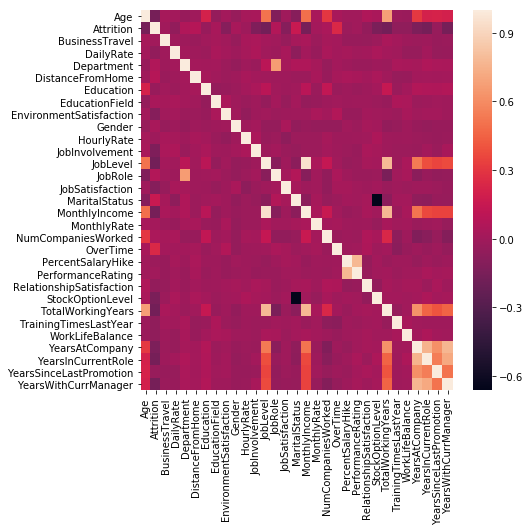

In [158]:
corr = df.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [159]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state=1)
#training and testing

In [160]:
X.shape

(1470, 30)

In [161]:
X_train.shape

(1176, 30)

In [162]:
X_test.shape

(294, 30)

In [163]:
from sklearn.ensemble import RandomForestClassifier

In [164]:
random_forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [165]:
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [166]:
y_pred = random_forest.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [167]:
X_test[3]

array([  36,    2,  164,    2,    2,    2,    3,    2,    1,   61,    2,
          3,    7,    3,    1, 7596, 3809,    1,    0,   13,    3,    2,
          2,   10,    2,    3,   10,    9,    9,    0], dtype=int64)

In [168]:
X_test[26]

array([   26,     2,  1357,     1,    25,     3,     1,     1,     1,
          48,     1,     1,     2,     3,     2,  2293, 10558,     1,
           0,    12,     3,     3,     0,     1,     2,     2,     1,
           0,     0,     1], dtype=int64)

In [169]:
from sklearn.metrics import accuracy_score,confusion_matrix 

In [170]:
rfacc=random_forest.score(X_train,y_train)
rfacc
#random forest accuracy score

0.9846938775510204

In [171]:
cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix

array([[245,   2],
       [ 40,   7]], dtype=int64)

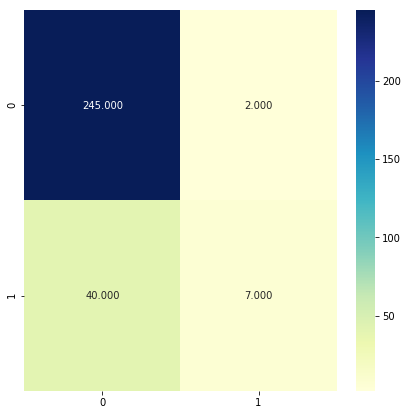

In [172]:
label=[0,1]
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu',fmt='.3f',xticklabels=label,yticklabels=label)

In [173]:
from sklearn.svm import SVC

In [174]:
model2=SVC()

In [175]:
model2.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [176]:
Predict2=model2.predict(X_test)

In [178]:
sv=metrics.accuracy_score(y_test,y_pred)
sv
#accuracy score of svm

0.8571428571428571

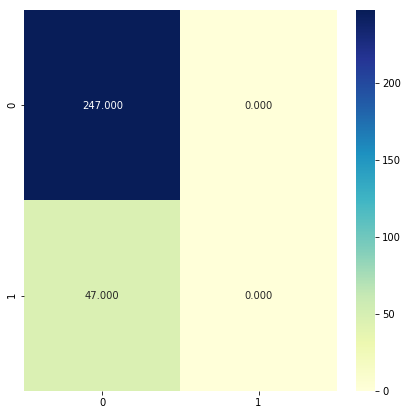

In [179]:
cnf_matrix = confusion_matrix(y_test,Predict2)
label=[0,1]
sns.heatmap(cnf_matrix,annot=True,cmap='YlGnBu',fmt='.3f',xticklabels=label,yticklabels=label)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1470 entries, 1153 to 920
Data columns (total 31 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int32
BusinessTravel              1470 non-null int32
DailyRate                   1470 non-null int64
Department                  1470 non-null int32
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null int32
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null int32
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null int32
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null int32
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked         

In [181]:
inputs=[[26,     2,  1357,     1,    25,     3,     1,     1,     1,
          48,     1,     1,     2,     3,     2,  2293, 10558,     1,
           0,    12,     3,     3,     0,     1,     2,     2,     1,
           0,     0,     1]]

In [182]:
y_pred = random_forest.predict(inputs)


In [183]:
if (y_pred == 0):
    print("Retention")
else:
    print("Attenuation")
    #prediction for given inputs

Attenuation


In [184]:
from sklearn.model_selection import train_test_split
P_train, P_test, q_train, q_test = train_test_split(input_data,target_data,test_size=0.2,random_state=1)

In [185]:
P_train.shape

(1176, 10)

In [186]:
P_test.shape

(294, 10)

In [187]:
random_forest.fit(P_train,q_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [190]:
q_pred=random_forest.predict(P_test)
q_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [192]:
rfi=random_forest.score(P_train,q_train)
rfi
#accuracy score of random forest(considering only the important features)

0.9770408163265306

In [193]:
cn=confusion_matrix(q_test,q_pred)
cn

array([[236,  11],
       [ 38,   9]], dtype=int64)

In [194]:
imp=[[26,1357,25,2293,10558,0,1,1,0,1]]
#features selection

In [195]:
q_pred=random_forest.predict(imp)

In [196]:
if(q_pred==0):
    print("Retention")
else:
    print("Attenuation")

Retention


In [197]:
from sklearn.neighbors import KNeighborsClassifier


In [80]:
knn=KNeighborsClassifier(n_neighbors=5)

In [81]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
k_pred=knn.predict(X_test)

In [198]:
kn=knn.score(X_train,y_train)
kn

0.8571428571428571

In [199]:
kncn=confusion_matrix(y_test,k_pred)
kncn

ValueError: Found input variables with inconsistent numbers of samples: [294, 1]

In [200]:
k_pred=knn.predict(inputs)

In [201]:
if(k_pred==0):
    print("Retention")
else:
    print("Attenuation")

Retention


In [202]:
from sklearn.naive_bayes import GaussianNB

In [203]:
nb=GaussianNB()

In [204]:
nb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [205]:
n_pred=nb.predict(X_test)

In [206]:
nbacc=nb.score(X_train,y_train)
nbacc

0.7993197278911565

In [207]:
n_pred=nb.predict(inputs)

In [208]:
if(n_pred==0):
    print("Retention")
else:
    print("Attenuation")

Attenuation


In [209]:
from sklearn import tree

In [210]:
dec=tree.DecisionTreeClassifier()

In [211]:
dec.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [212]:
d_pred=dec.predict(X_test)

In [214]:
dacc=metrics.accuracy_score(y_test,d_pred)
dacc

0.7721088435374149

In [215]:
d_pred=dec.predict(inputs)

In [216]:
if(d_pred==0):
    print("Retention")
else:
    print("Attenuation")

Attenuation


In [217]:
from sklearn.linear_model import LogisticRegression

In [218]:
lr=LogisticRegression()

In [219]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [220]:
l_pred=lr.predict(X_test)

In [221]:
lacc=lr.score(X_train,y_train)
lacc

0.8724489795918368

In [222]:
l_pred=lr.predict(inputs)

In [223]:
if(l_pred==0):
    print("Retention")
else:
    print("Attenuation")

Attenuation


In [224]:
from sklearn.linear_model import SGDClassifier

In [225]:
sgd=SGDClassifier(loss="modified_huber",penalty="elasticnet")

In [226]:
sgd.fit(X_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
       max_iter=None, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='elasticnet', power_t=0.5, random_state=None, shuffle=True,
       tol=None, validation_fraction=0.1, verbose=0, warm_start=False)

In [227]:
sg_pred=sgd.predict(X_test)

In [228]:
sacc=sgd.score(X_train,y_train)
sacc

0.8384353741496599

In [229]:
sg_pred=sgd.predict(inputs)

In [230]:
if(sg_pred==0):
    print("Retention")
else:
    print("Attenuation")

Retention


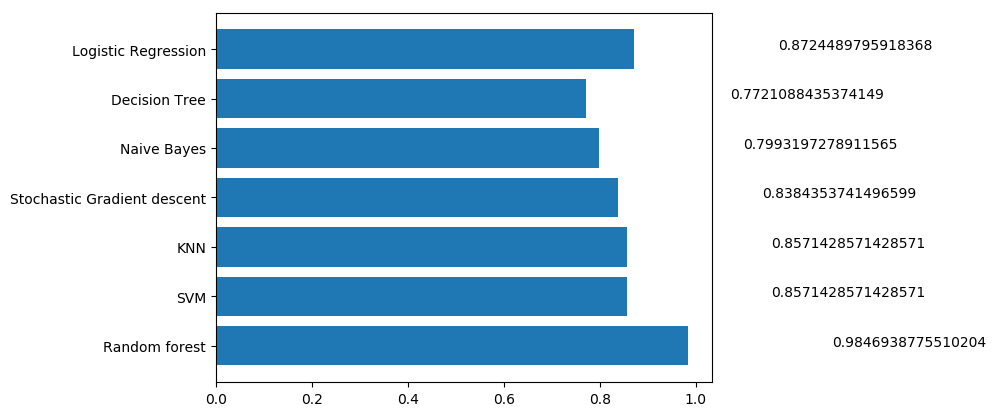

In [243]:
x=["Random forest","SVM","KNN","Stochastic Gradient descent","Naive Bayes","Decision Tree","Logistic Regression"]
y=[rfacc,sv,kn,sacc,nbacc,dacc,lacc]
plt.barh(x,y)

for index, value in enumerate(y):
    plt.text(value+.30, index, str(value))

In [232]:
scores=[rfacc,sv,kn,nbacc,dacc,lacc,sacc]

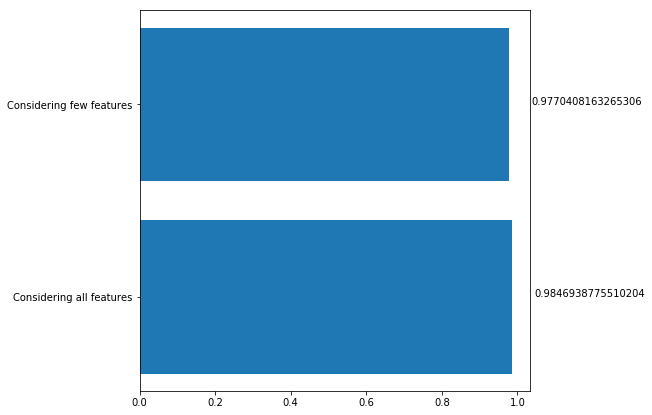

In [116]:
x=["Considering all features","Considering few features"]
y=[rfacc,rfi]
plt.barh(x,y)
for index, value in enumerate(y):
    plt.text(value+.06, index, str(value))